In [132]:
##Import necessary libraries
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline

In [133]:
## Load the dataset
heart_disease= pd.read_csv("data/heart-disease.csv")
## Display the first few rows of the dataset
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
## Split the dataset into features and target variable
from sklearn.model_selection import train_test_split
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [224]:
## Import a classification model 
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [225]:
## Fit the model to the training data
np.random.seed(42)
clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [226]:
## Calculate the accuracy of the model 
clf.score(X_test,y_test)

0.8360655737704918

In [227]:
clf.score(X_train,y_train)

1.0

In [139]:
##We have overfitting , so we will try different models to see if we can get better results.

In [228]:
## Import other classification models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [229]:
## Dictionary of models to try
dict_models={
    "Random Forest": RandomForestClassifier(),
    "Linear SVC": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression()
}
## Dictionary to store results
results={}

In [230]:
## Fit and evaluate each model
for model_name,model in dict_models.items():
    model.fit(X_train,y_train)
    results[model_name]=model.score(X_test,y_test)

c:\Users\moham\Desktop\HeartDisease-Classifier\heart\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [231]:
## Display the results
np.random.seed(42)
results

{'Random Forest': 0.8524590163934426,
 'Linear SVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'Logistic Regression': 0.8852459016393442}

<Axes: >

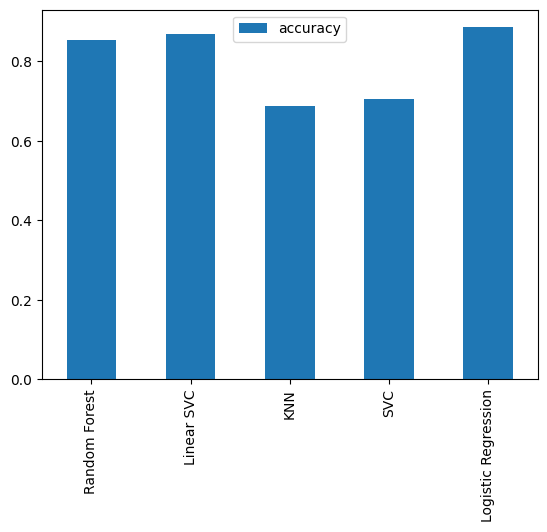

In [232]:
##Visualize the results
results_df=pd.DataFrame(results.values(),
                         results.keys(),
                        columns=["accuracy"])

results_df.plot.bar()
##I had logisitic regression as the best model with 88% accuracy, but I will try to improve it by tuning the hyperparameters.

In [233]:
##different hyperparameter tuning for logistic regression
##I used a randomized search to find the best hyperparameters for logistic regression.
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
}

In [234]:
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg=RandomizedSearchCV( estimator=LogisticRegression(),
                        param_distributions=log_reg_grid,
                        n_iter=10,
                        cv=5,
                        verbose=1,
                        random_state=42
)
##fitting the model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [235]:
## Display the best hyperparameters
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [ ]:
## Display the best score
rs_log_reg.best_score_

np.float64(0.8346088435374149)

In [242]:
best_model = rs_log_reg.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8852459016393442


In [259]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score,RocCurveDisplay

In [260]:
y_preds=best_model.predict(X_test)

In [262]:
confusion_matrix(y_test,y_preds)


array([[25,  4],
       [ 3, 29]])

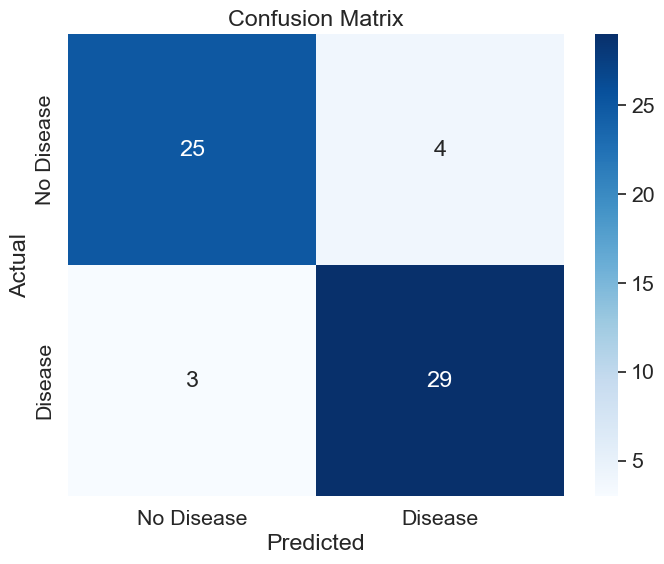

[[25  4]
 [ 3 29]]


In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=1.4) 
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(y_test, y_preds)
print(confusion_matrix(y_test, y_preds))

In [264]:
## Display classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Display precision, recall, and F1 score
p_score= precision_score(y_test, y_preds)
r_score= recall_score(y_test, y_preds)
f1_score= f1_score(y_test, y_preds)
print(f"The precision score is: {p_score},recall score is: {r_score}, and f1 score is: {f1_score}")

The precision score is: 0.8787878787878788,recall score is: 0.90625, and f1 score is: 0.8923076923076924


In [ ]:
## Save the model
from joblib import dump, load
dump(best_model, 'model/heart-disease-model.joblib')

['model/heart-disease-model.joblib']

In [270]:
##if you want to load the model later, you can use the following code:
loaded_model = load('model/heart-disease-model.joblib')
print(f"Model_score: {best_model.score(X_test, y_test)}")
print(f"Loaded model score: {loaded_model.score(X_test, y_test)}")



Model_score: 0.8852459016393442
Loaded model score: 0.8852459016393442
